In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "/data3/lsf/Pein/Power-Prediction/output/24-07-16_result/24-07-16-joined_metrics.csv"
df = pd.read_csv(path)

# Truncate values larger than 3000 to be 3000
df["train_rmse"] = df["train_rmse"].clip(upper=3000)
df["val_rmse"] = df["val_rmse"].clip(upper=3000)
df["test_rmse"] = df["test_rmse"].clip(upper=3000)

# Display the first few rows of the dataframe
print(df.head())

           exp_date  train_rmse  train_custom_acc  val_rmse_for_best_train  \
0  2024-07-17 04:57  3000.00000      -3167.121826               2829.37770   
1  2024-07-17 04:12   103.35466         58.004913                376.41534   
2  2024-07-17 00:42   255.11996        -84.570045                428.44302   
3  2024-07-16 20:26   257.82080        -90.633080                492.86246   
4  2024-07-17 04:54   580.43427       -374.220795                569.45996   

   test_rmse_for_best_train  train_epoch_for_best_train    val_rmse  \
0                3711.97490                          13  2829.37770   
1                 193.03676                          32   384.05832   
2                 298.18326                          10   414.10278   
3                 319.11612                          13   451.33795   
4                 578.01330                          10   569.45996   

   val_custom_acc  train_rmse_for_best_val  test_rmse_for_best_val  ...  \
0    -2911.126709            

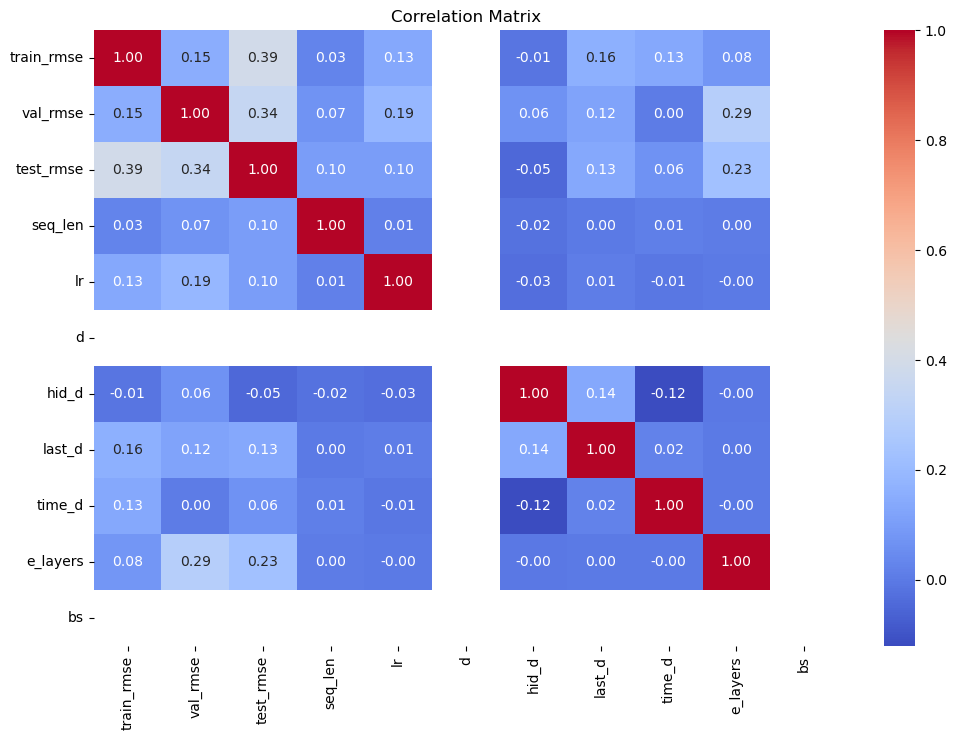

In [3]:
# Correlation matrix
corr_matrix = df[
    [
        "train_rmse",
        "val_rmse",
        "test_rmse",
        "seq_len",
        "lr",
        "d",
        "hid_d",
        "last_d",
        "time_d",
        "e_layers",
        "bs",
    ]
].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [6]:
# # Pairplot to visualize relationships
# sns.pairplot(
#     df[
#         [
#             "train_rmse",
#             "val_rmse",
#             "test_rmse",
#             "seq_len",
#             "lr",
#             "d",
#             "hid_d",
#             "last_d",
#             "time_d",
#             "e_layers",
#             "bs",
#         ]
#     ]
# )
# plt.show()

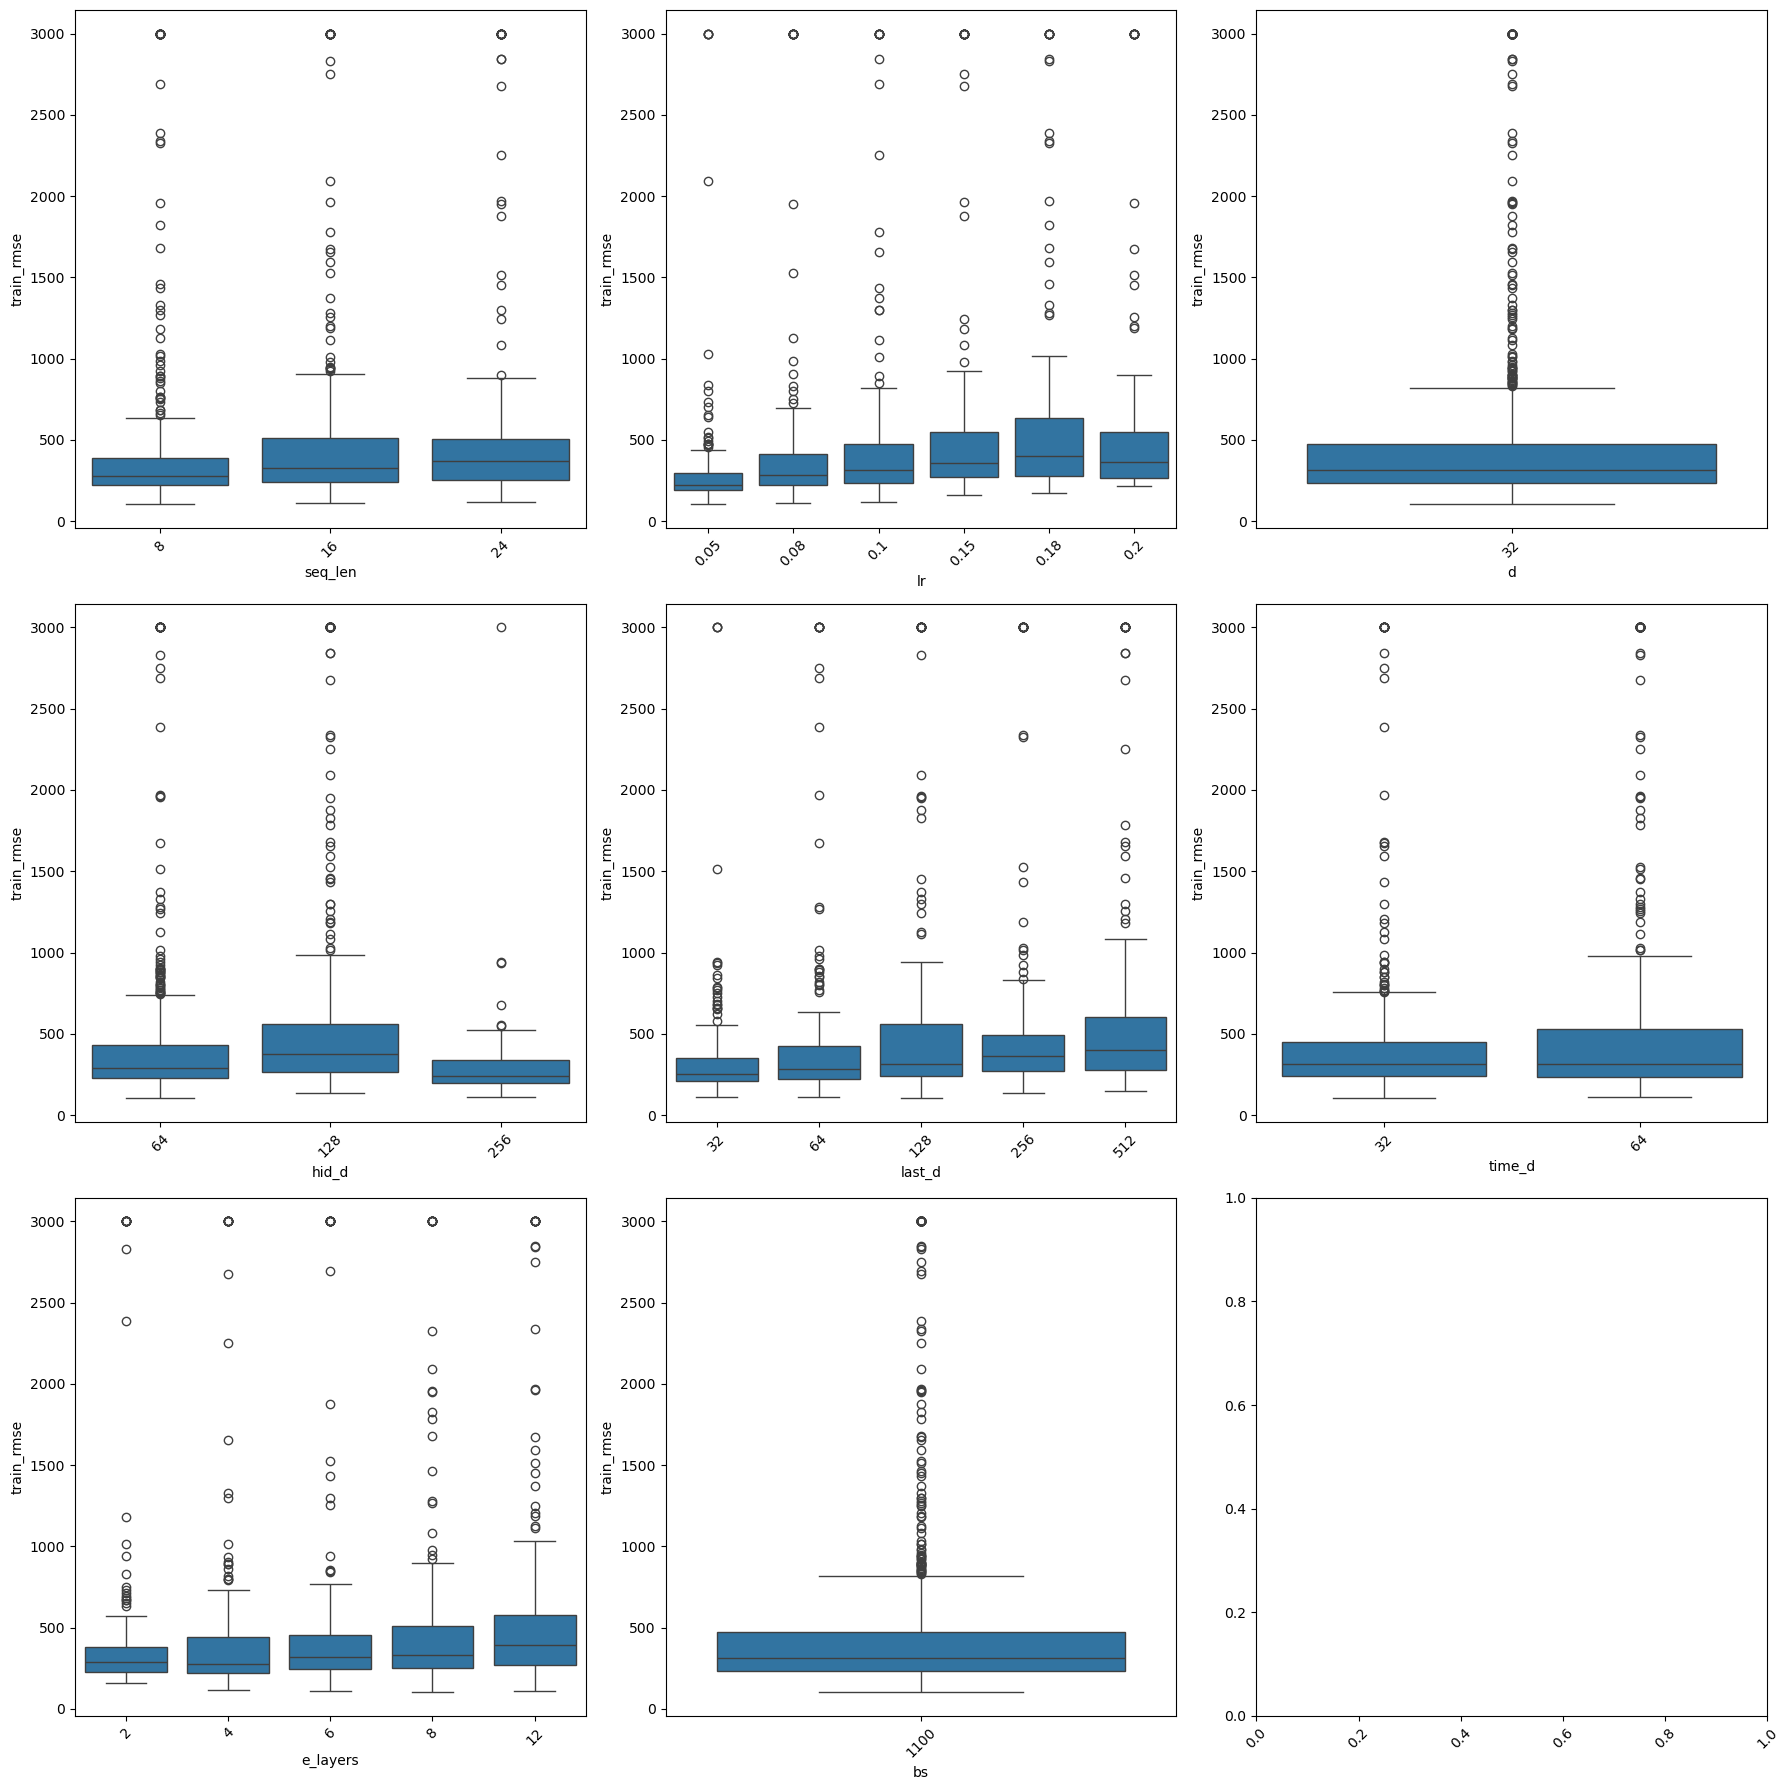

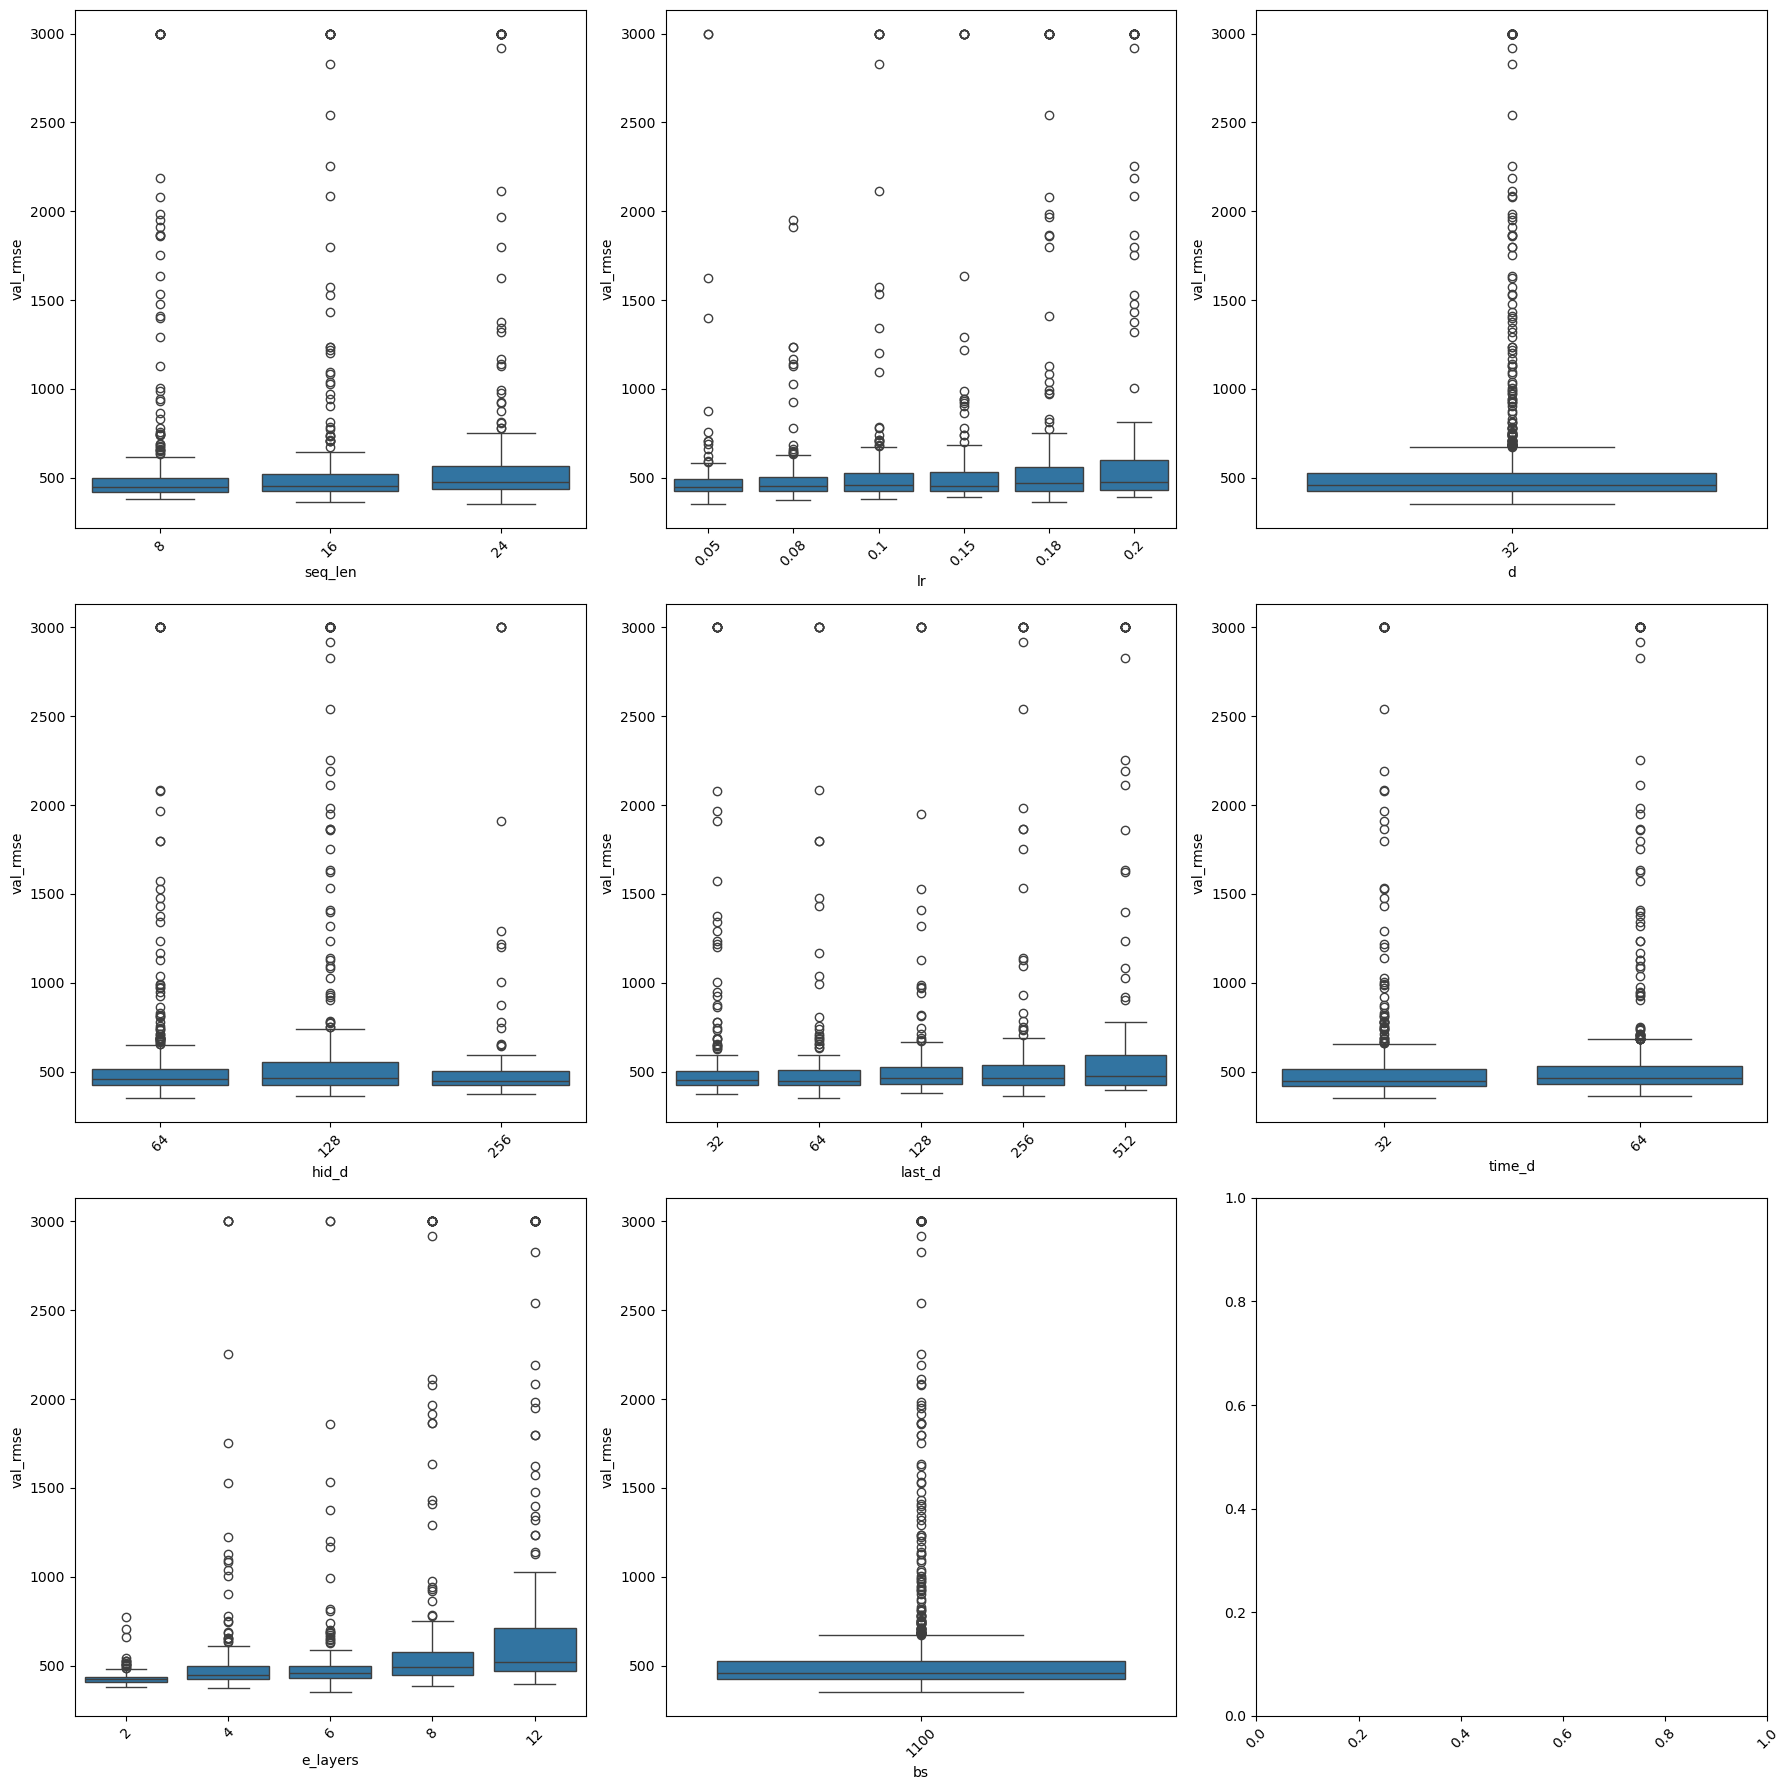

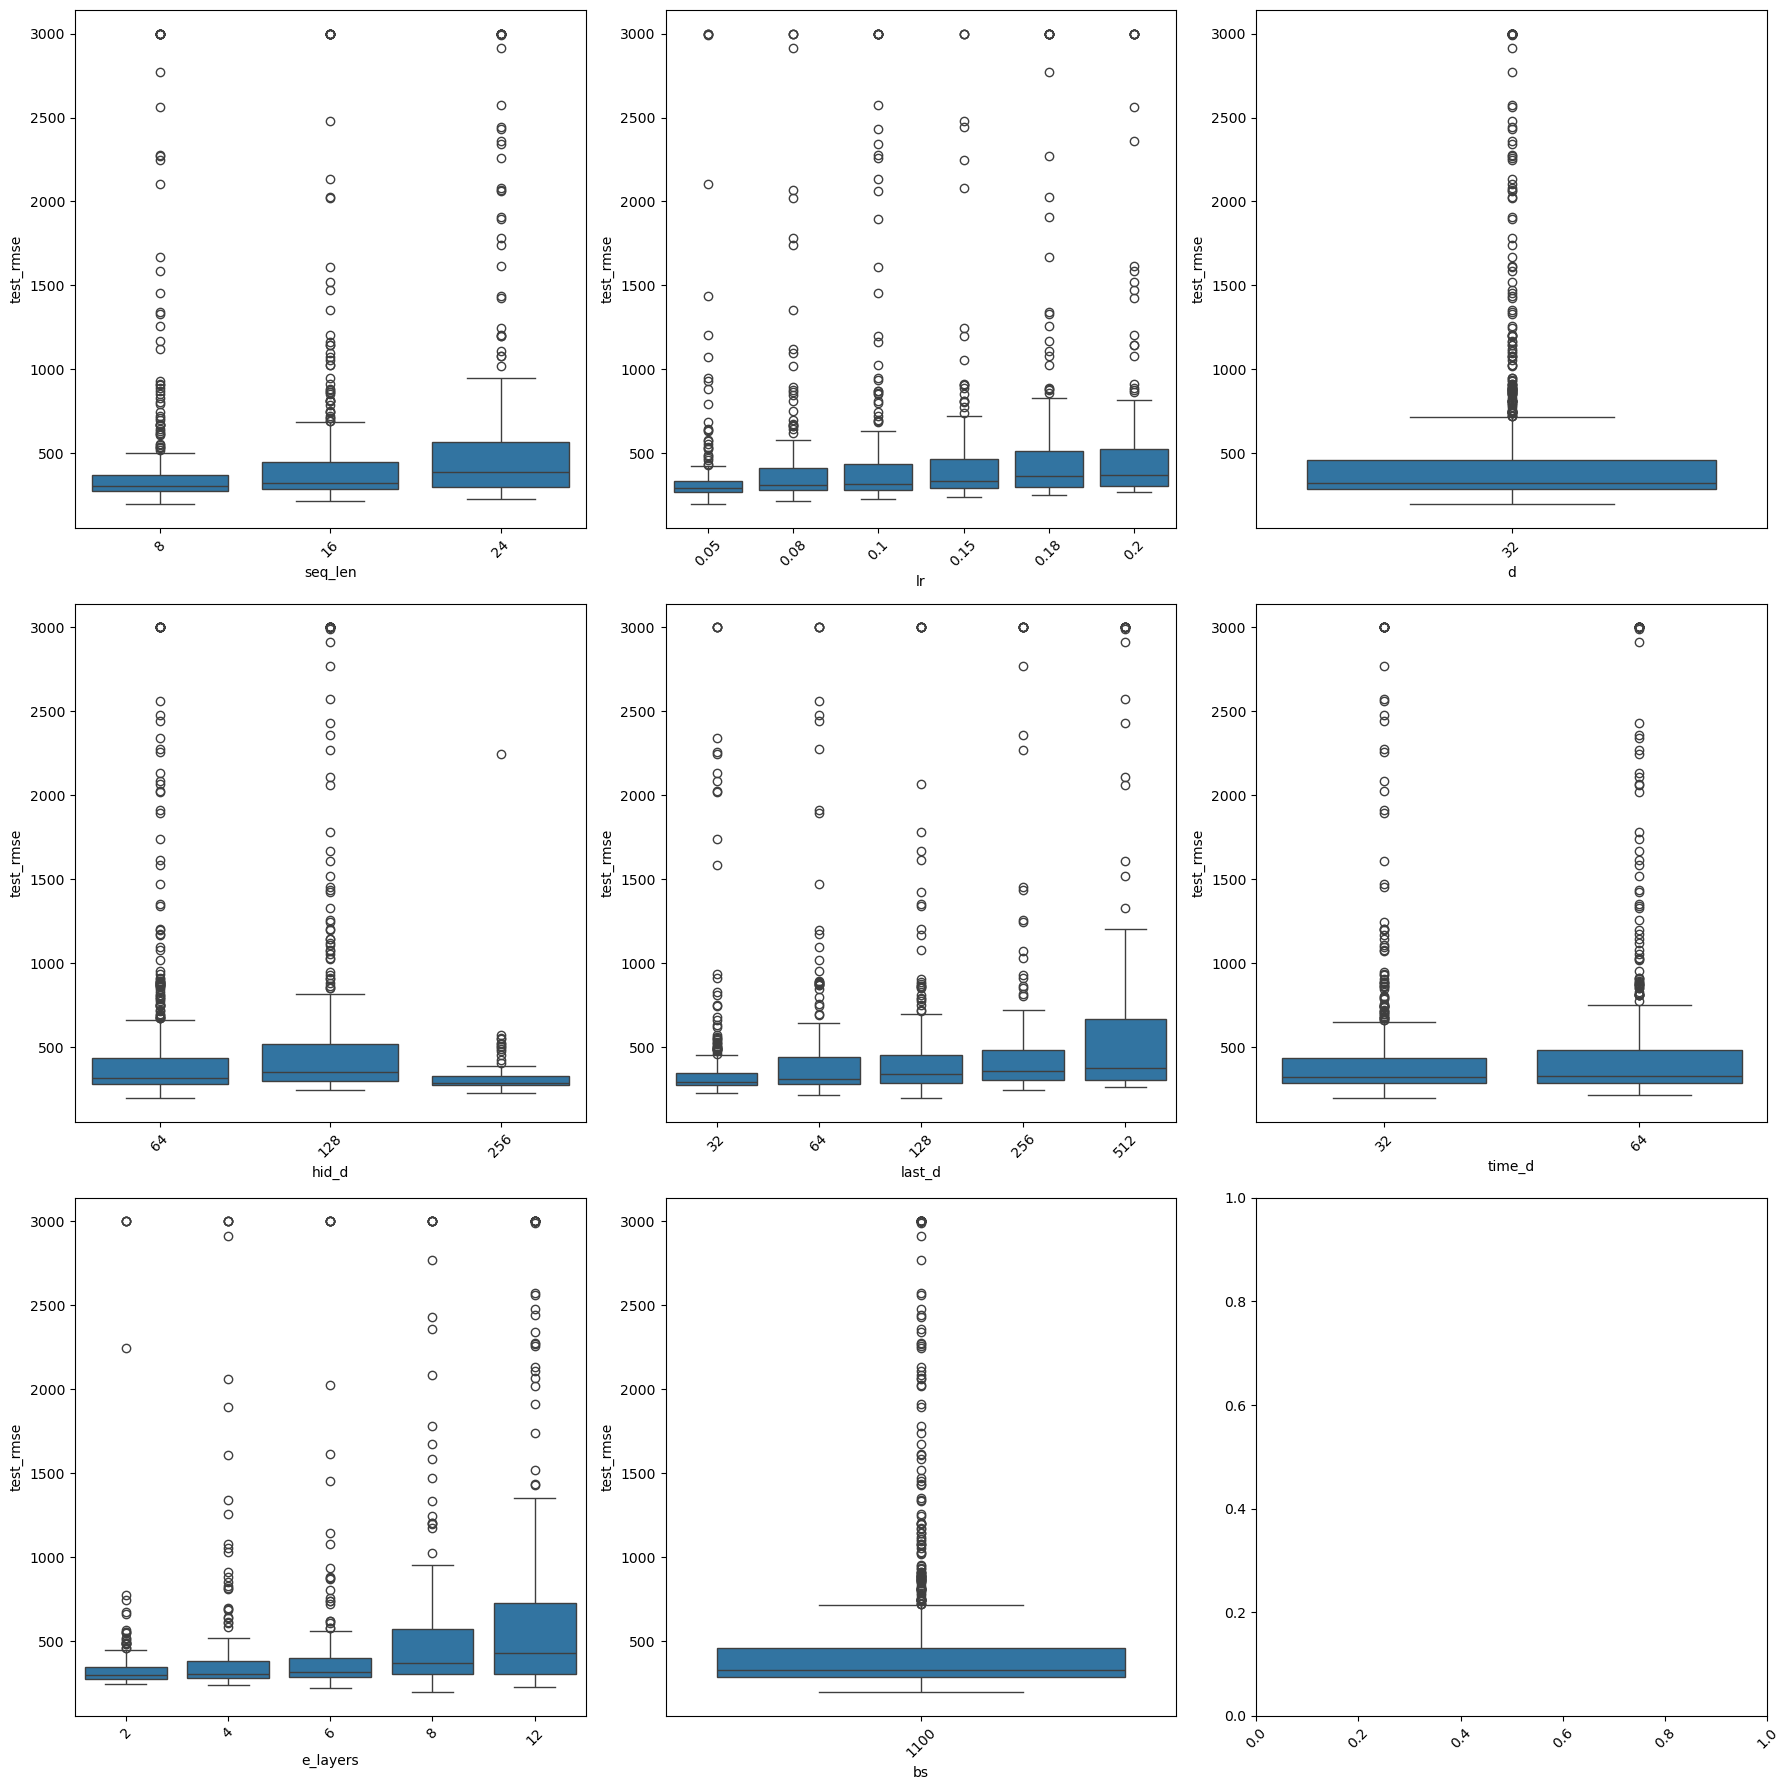

In [4]:
# Analyzing the effect of each setting on RMSEs
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# Plotting
sns.boxplot(ax=axes[0, 0], x="seq_len", y="train_rmse", data=df)
sns.boxplot(ax=axes[0, 1], x="lr", y="train_rmse", data=df)
sns.boxplot(ax=axes[0, 2], x="d", y="train_rmse", data=df)
sns.boxplot(ax=axes[1, 0], x="hid_d", y="train_rmse", data=df)
sns.boxplot(ax=axes[1, 1], x="last_d", y="train_rmse", data=df)
sns.boxplot(ax=axes[1, 2], x="time_d", y="train_rmse", data=df)
sns.boxplot(ax=axes[2, 0], x="e_layers", y="train_rmse", data=df)
sns.boxplot(ax=axes[2, 1], x="bs", y="train_rmse", data=df)

for ax in axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()

# Repeat for val_rmse and test_rmse
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

sns.boxplot(ax=axes[0, 0], x="seq_len", y="val_rmse", data=df)
sns.boxplot(ax=axes[0, 1], x="lr", y="val_rmse", data=df)
sns.boxplot(ax=axes[0, 2], x="d", y="val_rmse", data=df)
sns.boxplot(ax=axes[1, 0], x="hid_d", y="val_rmse", data=df)
sns.boxplot(ax=axes[1, 1], x="last_d", y="val_rmse", data=df)
sns.boxplot(ax=axes[1, 2], x="time_d", y="val_rmse", data=df)
sns.boxplot(ax=axes[2, 0], x="e_layers", y="val_rmse", data=df)
sns.boxplot(ax=axes[2, 1], x="bs", y="val_rmse", data=df)

for ax in axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(3, 3, figsize=(18, 18))

sns.boxplot(ax=axes[0, 0], x="seq_len", y="test_rmse", data=df)
sns.boxplot(ax=axes[0, 1], x="lr", y="test_rmse", data=df)
sns.boxplot(ax=axes[0, 2], x="d", y="test_rmse", data=df)
sns.boxplot(ax=axes[1, 0], x="hid_d", y="test_rmse", data=df)
sns.boxplot(ax=axes[1, 1], x="last_d", y="test_rmse", data=df)
sns.boxplot(ax=axes[1, 2], x="time_d", y="test_rmse", data=df)
sns.boxplot(ax=axes[2, 0], x="e_layers", y="test_rmse", data=df)
sns.boxplot(ax=axes[2, 1], x="bs", y="test_rmse", data=df)

for ax in axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()

In [5]:
# Calculate the sum of rmse values for each row
df["sum_rmse"] = df["train_rmse"] + df["val_rmse"] + df["test_rmse"]

# Sort the rows based on the sum of rmse values
sorted_df = df.sort_values(by="sum_rmse")

# Print the top rows with the minimal sum of rmse
top_n = 10  # Number of top rows to print
print(sorted_df.head(top_n))

              exp_date  train_rmse  train_custom_acc  val_rmse_for_best_train  \
1     2024-07-17 04:12  103.354660         58.004913                376.41534   
254   2024-07-17 06:17  111.960396         11.102910                478.71005   
68    2024-07-16 23:56  121.659700         31.136648                430.40140   
934   2024-07-17 02:53  113.618010         48.612377                434.11188   
913   2024-07-17 04:55  119.075630         33.474400                452.27580   
39    2024-07-17 06:05  124.415470         30.777302                445.82013   
52    2024-07-16 23:54  149.211520         21.154963                438.24545   
625   2024-07-16 20:21  178.587430         35.642666                396.00380   
866   2024-07-16 23:16  127.168430         56.023476                488.15457   
1037  2024-07-16 22:31  126.382910         34.091103                414.72400   

      test_rmse_for_best_train  train_epoch_for_best_train   val_rmse  \
1                    193.03676     